# Thompson Sampling

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [12]:
import random
N = 5000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_draw = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (max_random < random_draw):
      max_random = random_draw
      ad = i

  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if (reward == 0):
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  else:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  total_reward = total_reward + reward

## Visualising the results - Histogram

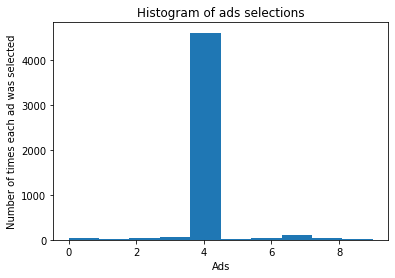

In [13]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()